# <center> Quantum Computing basics with Qiskit </center>

This project aims to teach me the basics of Quantum Computing and to discover Qiskit. 

Qiskit is an open source software development kit (SDK) for working with OpenQASM and the IBM Q quantum processors. More informations there : https://qiskit.org/

This project is based ont he Coursera Project "Programming a Quantum Computer with Qiskit - IBM SDK" made by Farhad Abdi : https://www.coursera.org/learn/programming-quantum-computer-qiskit/home/welcome

## 1. Fundamentals of Quantum Computation

### Basic Arithmatic Operations & Complex Numbers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Complex numbers are always of the form

\begin{align}
\alpha = a + bi
\end{align}


In [2]:
1j * 1j

(-1+0j)

In [3]:
z = 2 - 1j
w = -4 + 2j
print("Real of z:", np.real(z))
print("Image of w:", np.imag(w))

Real of z: 2.0
Image of w: 2.0


In [4]:
z + w

(-2+1j)

### Complex conjugate

In [5]:
w

(-4+2j)

In [6]:
np.conj(w)

(-4-2j)

### Norms/Absolute Values



\begin{align} ||z|| &= \sqrt{zz^*} = \sqrt{|z|^2},\\ ||w|| &= \sqrt{ww^*} = \sqrt{|w|^2}, \end{align} 

In [7]:
np.abs(z)

2.23606797749979

In [8]:
np.abs(w)

4.47213595499958

### Row Vectors, Column Vectors, and Bra-Ket Notation

\begin{align} \text{Column Vector:} \ \begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_n
\end{pmatrix} 
\quad \quad \text{Row Vector:} \ \begin{pmatrix}
a_1, & a_2, & \cdots, & a_n
\end{pmatrix} \end{align}



In [9]:
row_vec = np.array([1, 2+2j, 3])
print(row_vec)

[1.+0.j 2.+2.j 3.+0.j]


In [10]:
column_vec = np.array([[1], [2+2j], [3j]])
print(column_vec)

[[1.+0.j]
 [2.+2.j]
 [0.+3.j]]


Row vectors in quantum mechanics are also called **bra-vectors**, and are denoted as follows:

\begin{align} \langle A| = \begin{pmatrix}
a_1, & a_2, \cdots, & a_n
\end{pmatrix} \end{align}

Column vectors are also called **ket-vectors** in quantum mechanics denoted as follows:

\begin{align} |B\rangle = \begin{pmatrix}
b_1 \\ b_2 \\ \vdots \\ b_n
\end{pmatrix} \end{align}

In general, if we have a column vector, i.e. a ket-vector:

\begin{align} |A\rangle = \begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_n
\end{pmatrix} \end{align}

the corresponding bra-vector:

\begin{align} \langle A| = \begin{pmatrix}
a_1^*, & a_2^*, & \cdots, & a_n^*
\end{pmatrix} \end{align}


### Inner Product

\begin{align} \langle A| = \begin{pmatrix}
a_1, & a_2, & \cdots, & a_n
\end{pmatrix}, \quad \quad
|B\rangle = \begin{pmatrix}
b_1 \\ b_2 \\ \vdots \\ b_n
\end{pmatrix} \end{align}

Taking the inner product of $\langle A|$ and $|B\rangle$ gives the following:

\begin{align} \langle A| B \rangle &= \begin{pmatrix} 
a_1, & a_2, & \cdots, & a_n
\end{pmatrix}
\begin{pmatrix}
b_1 \\ b_2 \\ \vdots \\ b_n
\end{pmatrix}\\
&= 
a_1b_1 + a_2b_2 + \cdots + a_nb_n\\
&= \sum_{i=1}^n a_ib_i
\end{align}

In [11]:
# Define the 4x1 matrix version of a column vector (instead of using the np.array() version):
A = np.array([[1], [4 - 5j], [5], [-3]])
print(A)

[[ 1.+0.j]
 [ 4.-5.j]
 [ 5.+0.j]
 [-3.+0.j]]


In [12]:
# Define B as a 1x4 matrix
B = np.array([1, 5, -4j, -1j])
print(B)

[ 1.+0.j  5.+0.j -0.-4.j -0.-1.j]


In [13]:
# Compute <B|A>
np.dot(B, A)

array([21.-42.j])

### Matrices


\begin{align}
M = \begin{pmatrix}
2-i & -3 \\
-5i & 2
\end{pmatrix}
\end{align}

In [14]:
M = np.array([[2-1j, 3], [-5j, 2]])
print(M)

[[ 2.-1.j  3.+0.j]
 [-0.-5.j  2.+0.j]]


In [15]:
M = np.matrix([[2-1j, -3], [-5j, 2]])
print(M)

[[ 2.-1.j -3.+0.j]
 [-0.-5.j  2.+0.j]]


Hermitian conjugates are given by taking the conjugate transpose of the matrix

In [16]:
M.H

matrix([[ 2.+1.j, -0.+5.j],
        [-3.-0.j,  2.-0.j]])

### Tensor Products of Matrices

\begin{align}
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix} \otimes 
\begin{pmatrix}
x & y \\
z & w
\end{pmatrix} = 
\begin{pmatrix}
a \begin{pmatrix}
x & y \\
z & w
\end{pmatrix} & b \begin{pmatrix}
x & y \\
z & w
\end{pmatrix} \\
c \begin{pmatrix}
x & y \\
z & w
\end{pmatrix} & d \begin{pmatrix}
x & y \\
z & w
\end{pmatrix}
\end{pmatrix} = 
\begin{pmatrix}
ax & ay & bx & by \\
az & aw & bz & bw \\
cx & cy & dx & dy \\
cz & cw & dz & dw
\end{pmatrix}
\end{align}

In [17]:
np.kron(M, M)

matrix([[  3. -4.j,  -6. +3.j,  -6. +3.j,   9. -0.j],
        [ -5.-10.j,   4. -2.j,   0.+15.j,  -6. +0.j],
        [ -5.-10.j,   0.+15.j,   4. -2.j,  -6. +0.j],
        [-25. +0.j,   0.-10.j,   0.-10.j,   4. +0.j]])

## 2. Qubits, Bloch Sphere and Basis States

In [18]:
!pip install qiskit

In [19]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.2',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.9.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.21.0'}



\begin{align}
|\psi \rangle = \begin{pmatrix}
\alpha \\ \beta
\end{pmatrix}, \quad \text{where } \sqrt{\langle \psi | \psi \rangle} = 1. 
\end{align}

Think of Qubit as an Electron:

\begin{align}
\text{spin-up}: \ |0\rangle &= \begin{pmatrix} 1\\0 \end{pmatrix} \\
\text{spin-down}: \ |1\rangle & = \begin{pmatrix} 0\\1 \end{pmatrix}
\end{align}

In [20]:
from qiskit import *

Another representation is via Bloch Sphere:

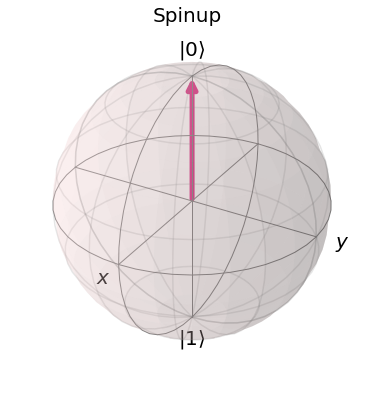

In [21]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0,0,1], title = 'Spinup')

### Spin + / - :

\begin{align}
\text{spin +}: \ |+\rangle &= \begin{pmatrix} 1/\sqrt{2} \\ 1/\sqrt{2} \end{pmatrix} = \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) \\
\text{spin -}: \ |-\rangle & = \begin{pmatrix} 1/\sqrt{2} \\ -1/\sqrt{2} \end{pmatrix} = \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right)
\end{align}

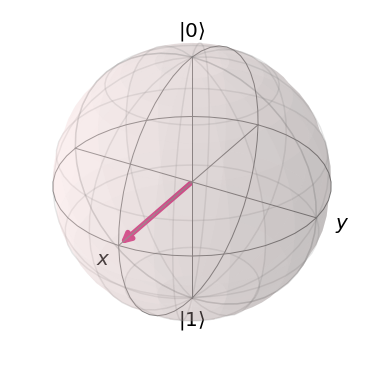

In [22]:
plot_bloch_vector([1,0,0])

### Basis States


\begin{align}
 |0\rangle &= \begin{pmatrix} 1\\0 \end{pmatrix} \\
 |1\rangle & = \begin{pmatrix} 0\\1 \end{pmatrix}
\end{align}
Preapring other states from Basis States:
\begin{align}
|00 \rangle &= |0\rangle \otimes |0\rangle = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix} = \begin{pmatrix} 1\\0\\0\\0 \end{pmatrix} \\
|01 \rangle &= |0\rangle \otimes |1\rangle = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 0\\1 \end{pmatrix} = \begin{pmatrix} 0\\1\\0\\0 \end{pmatrix} \\
|10 \rangle &= |1\rangle \otimes |0\rangle = \begin{pmatrix} 0\\1 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix} = \begin{pmatrix} 0\\0\\1\\0 \end{pmatrix} \\
|11 \rangle &= |1\rangle \otimes |1\rangle = \begin{pmatrix} 0\\1 \end{pmatrix} \otimes \begin{pmatrix} 0\\1 \end{pmatrix} = \begin{pmatrix} 0\\0\\0\\1 \end{pmatrix}
\end{align}

In [23]:
ket_zero = np.array([[1], [0]])
ket_one = np.array([[0], [1]])

In [24]:
np.kron(ket_one, ket_zero)

array([[0],
       [0],
       [1],
       [0]])

## 3. Quantum Gates and Circuits

In [25]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector

### Pauli Matrices

\begin{align}
I = \begin{pmatrix} 1&0 \\ 0&1 \end{pmatrix}, \quad
X = \begin{pmatrix} 0&1 \\ 1&0 \end{pmatrix}, \quad
Y = \begin{pmatrix} 0&i \\ -i&0 \end{pmatrix}, \quad
Z = \begin{pmatrix} 1&0 \\ 0&-1 \end{pmatrix} \quad
\end{align}

### X-gate

The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

Effect a gate has on a qubit: 

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$


In [26]:
!pip install pylatexenc

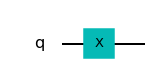

In [27]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output = 'mpl')

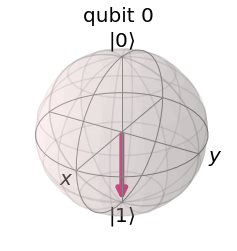

In [28]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out)

In [29]:
print(out)

[0.+0.j 1.+0.j]


### Z & Y-Gate



$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$




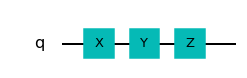

In [30]:
# Do Y-gate on qubit 0
qc.y(0)
# Do Z-gate on qubit 0
qc.z(0)
qc.draw(output = 'mpl')

### Hadamard Gate



$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

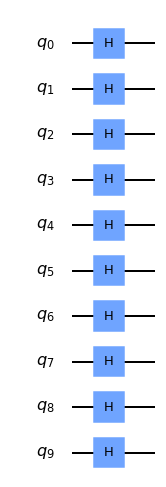

In [31]:
# Create circuit with three qubit
qc = QuantumCircuit(10)
# Apply H-gate to each qubit:
for qubit in range(10) : 
    qc.h(qubit)
# See the circuit:
qc.draw(output = 'mpl')

### Identity Gate



$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$$



$$ I = XX $$



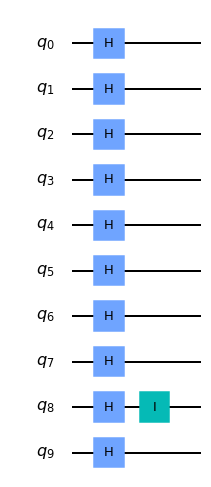

In [32]:
qc.i(8)
qc.draw(output = 'mpl')

 ** Other Gates: S-gate , T-gate, U-gate

## 4. Multiple Qubits, Entanglement

### Multiple Qubits

The state of two qubits :

$$ |psi\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$

In [33]:
from qiskit import *

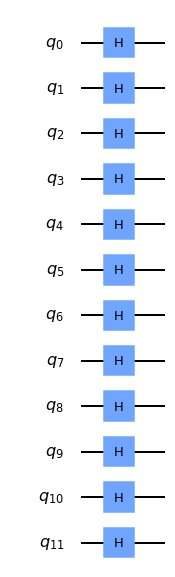

In [34]:
qc = QuantumCircuit(12)
# Apply H-gate to each qubit:
for qubit in range(12) : 
    qc.h(qubit)
# See the circuit:
qc.draw(output = 'mpl')

Each qubit is in the state $|+\rangle$, so we should see the vector:

$$ 
|{+++}\rangle = \frac{1}{\sqrt{8}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\
                              1 \\ 1 \\ 1 \\ 1 \\
              \end{bmatrix}
$$

In [35]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
print(out)

[0.015625+0.j 0.015625+0.j 0.015625+0.j ... 0.015625+0.j 0.015625+0.j
 0.015625+0.j]


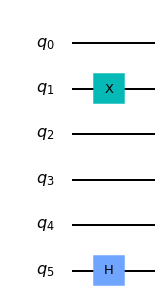

In [36]:
qc = QuantumCircuit(6)
qc.h(5)
qc.x(1)
qc.draw(output = 'mpl')



$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

The operation looks like this:

$$
X\otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
$$

Which we can then apply to our 4D statevector $|q_1 q_0\rangle$. You will often see the clearer notation:

$$
X\otimes H = 
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$

### C-Not Gate

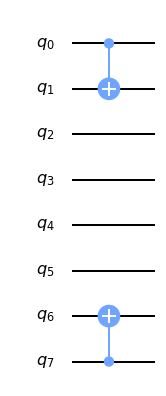

In [37]:
# Create circuit with two qubit
qc = QuantumCircuit(8)
# Apply CNOT
qc.cx(0,1)
qc.cx(7,6)
# See the circuit:
qc.draw(output = 'mpl')

Classical truth table of C-Not gate:

| Input (t,c) | Output (t,c) |
|:-----------:|:------------:|
| 00          | 00           |
| 01          | 11           |
| 10          | 10           |
| 11          | 01           |



### Entanglement

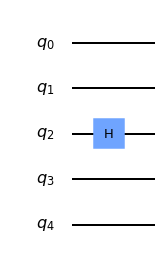

In [38]:
# Create two qubit circuit
qc = QuantumCircuit(5)
# Apply H-gate to the first:
qc.h(2)
qc.draw(output = 'mpl')

In [39]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc, backend).result().get_statevector()
print(final_state)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


Quantum System Sate is:

$$
|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle)
$$


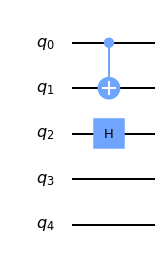

In [40]:
# Apply a CNOT:
qc.cx(0,1)
qc.draw(output = 'mpl')

In [41]:
# Let's see the result:
final_state = execute(qc, backend).result().get_statevector()
print(final_state)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


We see we have this final state (Bell State):

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 



Other Bell States:

## 5. Bernstein-Vazirani Algorithm


A black-box function $f$, which takes as input a string of bits ($x$), and returns either $0$ or $1$, that is:







$$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ where } x_n \textrm{ is }0 \textrm{ or } 1  $$ 

The function is guaranteed to return the bitwise product of the input with some string, $s$. 


In other words, given an input $x$, $f(x) = s \cdot x \, \text{(mod 2)} =\ x_0 * s_0+x_1*s_1+x_2*s_2+...\ $ mod 2

The quantum Bernstein-Vazirani Oracle:
    
1. Initialise the inputs qubits to the $|0\rangle^{\otimes n}$ state, and output qubit to $|{-}\rangle$.
2. Apply Hadamard gates to the input register
3. Query the oracle
4. Apply Hadamard gates to the input register
5. Measure

### Example with Two Qubits:

<ol>
    <li> The register of two qubits is initialized to zero:
    

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle$$

 
   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) $$

 
   </li>

   <li> For the string $s=11$, the quantum oracle performs the operation:
$$
|x \rangle \xrightarrow{f_s} (-1)^{x\cdot 11} |x \rangle. 
$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( (-1)^{00\cdot 11}|00\rangle + (-1)^{01\cdot 11}|01\rangle + (-1)^{10\cdot 11}|10\rangle + (-1)^{11\cdot 11}|11\rangle \right)$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)$$

 
   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_3 \rangle = \lvert 1 1 \rangle$$

 
   </li>

   <li> Measure to find the secret string $s=11$
   </li>


</ol>


In [42]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [43]:
s = 101011

In [44]:
from qiskit import *

In [45]:
qc = QuantumCircuit(6+1, 6)
qc.h([0, 1, 2, 3, 4, 5])
qc.x(6)
qc.h(6)
qc.barrier()

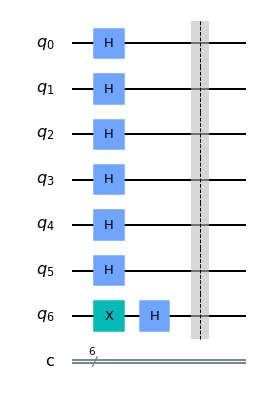

In [46]:
qc.draw(output = 'mpl')

In [47]:
qc = QuantumCircuit(6+1, 6)
qc.h([0, 1, 2, 3, 4, 5])
qc.x(6)
qc.h(6)
qc.barrier()
qc.cx(5, 6)
qc.cx(3, 6)
qc.cx(1, 6)
qc.cx(0, 6)
qc.barrier()

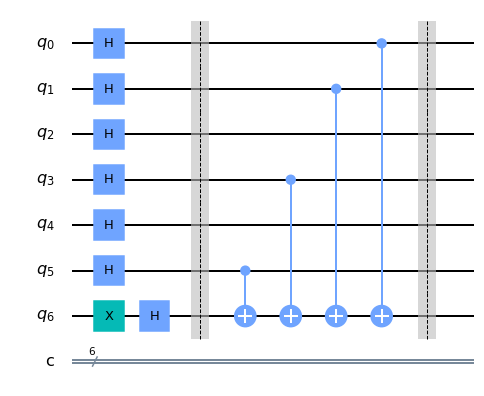

In [48]:
qc.draw(output = 'mpl')

In [49]:
qc = QuantumCircuit(6+1, 6)
qc.h([0, 1, 2, 3, 4, 5])
qc.x(6)
qc.h(6)
qc.barrier()
qc.cx(5, 6)
qc.cx(3, 6)
qc.cx(1, 6)
qc.cx(0, 6)
qc.barrier()
qc.h([0, 1, 2, 3, 4, 5])
qc.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])

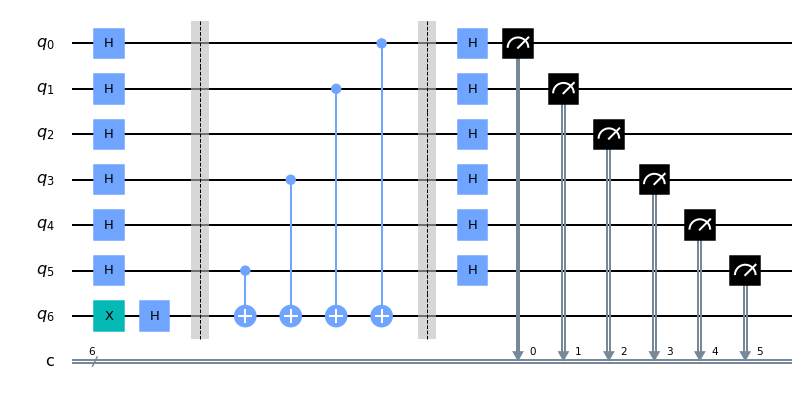

In [50]:
qc.draw(output = 'mpl')

In [51]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'101011': 1}
